In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Open the HDF5 file
with h5py.File('./dumps/prim.h5', 'r') as file:
    for key in file.keys():
        # Check if the key corresponds to a dataset
        if isinstance(file[key], h5py.Dataset):
            print(f"Dataset: {key}")
        elif isinstance(file[key], h5py.Group):
            print(f"Group: {key}")
# Access the datasets or groups within the file    
    rho = file['rho'][:]
    u1 = file['u1'][:]
    u2 = file['u2'][:]
    u3 = file['u3'][:]
    #print(rho.shape)

    # Flatten the first three indices
    flat_rho = rho.reshape(rho.shape[0] * rho.shape[1] * rho.shape[2])
    flat_u1 = u1.reshape(u1.shape[0] * u1.shape[1] * u1.shape[2])
    flat_u2 = u2.reshape(u2.shape[0] * u2.shape[1] * u2.shape[2])
    flat_u3 = u3.reshape(u3.shape[0] * u3.shape[1] * u3.shape[2])

    # Now 'flattened_data' is a 3D array with shape (32 * 32 * 32, 4, 4)
    print(np.max(flat_rho))
    print(flat_rho[0]*flat_u1[0])

Dataset: b1
Dataset: b2
Dataset: b3
Dataset: rho
Dataset: u1
Dataset: u2
Dataset: u3
Dataset: uu
Dataset: ye
0.9946397895344126
1.775990431475971e-05


In [17]:
aftmomen_x = [0] * flat_rho.shape[0]
aftmomen_y = [0] * flat_rho.shape[0]
aftmomen_z = [0] * flat_rho.shape[0]

for i in range(flat_rho.shape[0]):
    aftmomen_x[i] = flat_rho[i] * flat_u1[i]
    aftmomen_y[i] = flat_rho[i] * flat_u2[i]
    aftmomen_z[i] = flat_rho[i] * flat_u3[i]

In [18]:
# Open the HDF5 file
with h5py.File('momendens.h5', 'r') as file:
    for key in file.keys():
        # Check if the key corresponds to a dataset
        if isinstance(file[key], h5py.Dataset):
            print(f"Dataset: {key}")
        elif isinstance(file[key], h5py.Group):
            print(f"Group: {key}")
            # Access the datasets or groups within the file    
    
    px = file['px'][:]
    py = file['py'][:]
    pz = file['pz'][:]
    
    ux = file['ux'][:]
    uy = file['uy'][:]
    uz = file['uz'][:]
    
    rhodens = file['rhodens'][:]
    
rms= np.sqrt(np.mean(np.square(pz)))
rms2= np.sqrt(np.mean(np.square(aftmomen_z)))
    
print(rms)

print(px[0])
print(np.max(rhodens))
print(flat_rho[0])

Dataset: px
Dataset: py
Dataset: pz
Dataset: rhodens
Dataset: ux
Dataset: uy
Dataset: uz
0.00026570808172279105
1.775990431475971e-05
0.9946397895344126
0.0003192266886413547


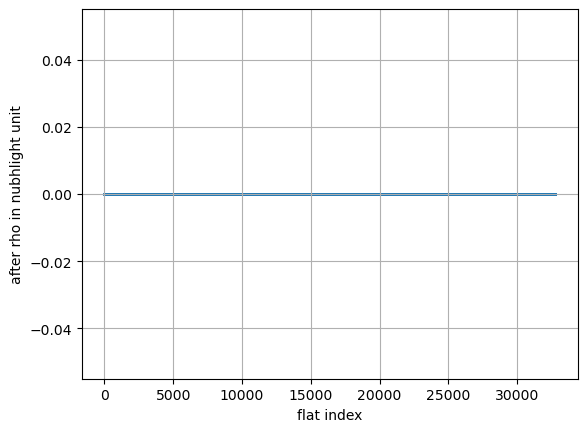

In [22]:
    i_values = []
    differences = []
    for i in range(32767):   
        diff = abs(aftmomen_z[i]-pz[i])
        #diff = abs(flat_rho[i])
        differences.append(diff)
        i_values.append(i)

        
plt.scatter(i_values,differences,s=1)
plt.xlabel("flat index")
plt.ylabel("after rho in nubhlight unit")
#plt.legend()
plt.grid(True)
#plt.savefig("fluid-sanitycheck-" + label + ".pdf")
plt.show()

In [70]:
1.8385846799889523e-08*6.17747e+17

11357801703.091352

In [12]:
# Open the HDF5 file
with h5py.File('extprim.h5', 'r') as file:
    for key in file.keys():
        # Check if the key corresponds to a dataset
        if isinstance(file[key], h5py.Dataset):
            print(f"Dataset: {key}")
        elif isinstance(file[key], h5py.Group):
            print(f"Group: {key}")
# Access the datasets or groups within the file    
    rho = file['rho'][:]
    print(rho.shape)
    print(np.max(rho))

Dataset: betax
Dataset: betay
Dataset: betaz
Dataset: lapse
Dataset: rho
Dataset: u1
Dataset: u2
Dataset: u3
Dataset: velx
Dataset: vely
Dataset: velz
Dataset: xp
Dataset: ye
Dataset: yp
Dataset: zp
(32768,)
1.8385846799889546e-08
